# Clustering Algorithms - $k$-Means

<div>
<img src="figures/Ml_kmeans.png" width="600"/>
</div>


## $k$-Means

The aim of clustering algorithms is to group data points based on a defined similarity measure (and this is crucial!). Here we will use the clustering algorithm $k$-Means. An algorithm that divides a given (even high-dimensional) data set into $k$ groups (clusters). 

K-means is the go-to unsupervised clustering algorithm, whcih is easy to implement and trains in next to no time. As the model trains by minimizing the sum of distances between data points and their corresponding clusters, it is relatable to other machine learning models.

In [3]:
%load_ext lab_black

In [2]:
# First, let's import all the needed libraries.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans


import warnings

warnings.filterwarnings("ignore", "use_inf_as_na")



### Introduction

<div>
<img src="figures/kmeans.png" width="600"/>
</div>

$k$-Means clustering is an unsupervised algorithm that groups unlabelled data into different clusters. The K in the title shows how many clusters will be created. It's important to know this before you start training the model. So, if we use K=3, we’ll get three clusters. The $k$-Means algorithm is used in fraud and error detection, and confirming existing clusters in the real world.

The algorithm is centroid-based, which basically means that each data point is assigned to the cluster with the closest centroid. You can use this algorithm for any number of dimensions, because we calculate the distance to centroids using the Euclidean distance. The idea behind $k$-Means is to make the distances between the data points and their assigned cluster centroid as small as possible. This is done by repeatedly moving data points to the closest centroid and centroid to the centre of their assigned points, which makes the clusters more compact and separated.

The great thing about the $k$-Means algorithm is that it’s simple to use, it can handle huge datasets, it always converges, and it works well with clusters of varying shapes and sizes. The drawbacks are that the number of clusters has to be chosen manually, the clusters are dependent on initial values, and it can be sensitive to outliers.

### Performing $k$-Means Clustering

The algorithm works as follows (somewhat simplified):

0. Choose a cluster number $k$ and select $k$ cluster centres (centroids) for initialisation. These centroids can be randomly distributed in the state space or elements can simply be randomly drawn from the training data set to serve as centroids. (Initialisation) 
1. assign each data point to the cluster whose cluster centre (centroid) is closest to this point. ‘Closeness’ is determined by the distance measure, which can be Euclid's distance, for example, which is calculated with the following equation:

$$
d(p,q) =  \sqrt{ \sum_{i=1}^{n}(q_i -p_i)^2}$$

2. recalculate all $k$ cluster centres: The mean value (in all dimensions) of all data points in a cluster results in the new cluster centre (centroid).
3. cancellation criterion fulfilled? (e.g. ‘maximum number of iterations reached’ or ‘cluster centres change only slightly’) Otherwise go to 1.

For the sake of simplicity, we use simulated data in this exercise:



In [4]:
cluster_df = pd.read_csv("data/cluster_sample_data.csv", header=None, sep=" ")
cluster_df.head(3)

,0,1
0,5.209759,4.191962
1,-0.550619,1.731674
2,1.990295,-1.352535


<Axes: xlabel='0', ylabel='1'>

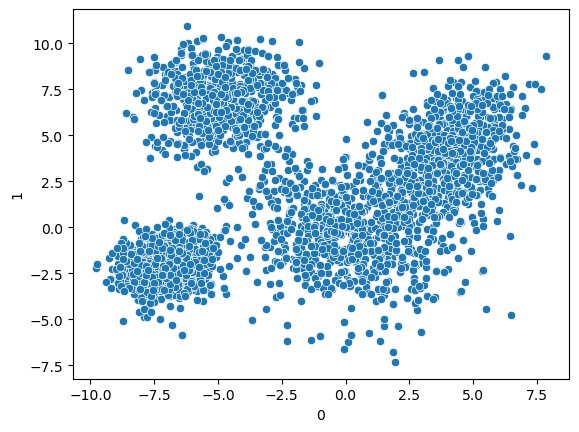

In [5]:
sns.scatterplot(
    data=cluster_df,
    x=0,
    y=1,
)

> **Question**: Even without $k$-Means clustering, how many clusters would you suggest ?

#### Normalisation
>
> Before applying a clustering algorithm, it's crucial to normalize the data to eliminate any outliers or anomalies.


In [ ]:
cluster_df.iloc[:,0].values

In [ ]:

from sklearn import preprocessing
#df_norm = cluster_df.copy()

#df_norm[0] = preprocessing.normalize([cluster_df[0]]).flatten()
#df_norm[1] = preprocessing.normalize([cluster_df[1]]).flatten()
#df_norm.head()


#### Determine the number of clusters (K=?)

**Elbow-method**
The optimal value of $k$ in the $k$-Means algorithm can be found using the elbow method. This involves finding the inertia value of every $k$ number of clusters from 1-10 and visualizing it.

Inertia: the sum of the squared distances of samples to their closest cluster center.

$$Inertia = Σ(distance(point, centroid)^2)$$
                 
We iterate the values of $k$ from 1 to n and calculate the values of distortions for each value of k and calculate the distortion and inertia for each value of $k$ in the given range.

In [ ]:
def elbow_plot(data,clusters):
    inertia = []
    for n in range(1, clusters):
        algorithm = KMeans(
            n_clusters=n,
            init="k-means++",
            random_state=125,
        )
        algorithm.fit(data)
        inertia.append(algorithm.inertia_)
    # Plot
    plt.plot(np.arange(1 , clusters) , inertia , 'o')
    plt.plot(np.arange(1 , clusters) , inertia , '-' , alpha = 0.5)
    plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
    plt.show();

elbow_plot(cluster_df,10)

We obtained an optimal value of 4. Perfect, thats what we also suggested!

####   Performing $k$-Means

As we already discussed we perform $k$-Means by initializing cluster centroids, assigning these data points to clusters. We then update cluster centroids and Iteratively update the centroids. In Python we perform $k$-Means as follows:


In [ ]:
n_clusters = 4
epochs = 100


algorithm = KMeans(n_clusters=n_clusters,init="k-means++",max_iter=epochs,random_state=120 )
algorithm.fit(cluster_df)
labels = algorithm.labels_

In [ ]:
for k in algorithm.cluster_centers_:
    print(k)#algorithm.cluster_centers_

In [ ]:
# The number of iterations required to converge
algorithm.n_iter_

In [ ]:
algorithm.labels_

###  Assign data points to clusters and plot final Result

In [ ]:
y_kmeans = algorithm.predict(cluster_df)


plt.scatter(cluster_df.iloc[:, 0], cluster_df.iloc[:, 1], c=y_kmeans, s=20, cmap="Set2")

centers = algorithm.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=0.9);
plt.title("Scikit-Learn K-means Results")

> #### **Exercise**
>
> Take a look at another data set. 
> Visualise the data as a scatterplot. How many cluster centres can be expected?
> Why does $k$-Means clustering not work well here? What are the limitations of $k$-Means?


In [ ]:

cluster_df = pd.read_csv("data/cluster_sample_data_moons.csv", header=None, sep=" ")
cluster_df.head(3)

#### solution

In [ ]:

sns.scatterplot(
    data=cluster_df,
    x=0,
    y=1,
)

In [ ]:
### normalize


from sklearn import preprocessing

df_norm = preprocessing.normalize(cluster_df)

In [ ]:
## elbow plot

elbow_plot(df_norm,10)

In [ ]:
n_clusters = 2
epochs = 100


algorithm = KMeans(n_clusters=n_clusters,n_init='auto')#, init="k-means++",max_iter=epochs,random_state=120) # init="k-means++"
algorithm.fit(df_norm)
labels = algorithm.labels_

algorithm.n_iter_

In [ ]:
sns.scatterplot(data = cluster_df, x = 0, y = 1, hue = labels, palette="Set2");

plt.title("Scikit-Learn K-means Results")

* $k$-Means clustering may not work well in this case because the data points in the two clusters are unevenly distributed. $k$-Means is based on the assumption that the clusters are spherical and of similar size. If this assumption is not met, clustering can produce poor results.

* $k$-Means is limited to linear cluster boundaries


> #### **Exercise**
> 
> Research an alternative to $k$-Means that could work here! Can you even implement it with plot?


#### solution


A possible alternative that could work better is the so-called ‘DBSCAN’ (Density-Based Spatial Clustering of Applications with Noise). DBSCAN is based on the density of data points and can identify clusters even if they are not spherical or of similar size.


#### Ressources for this script: 

* [Artley 2022](https://towardsdatascience.com/unsupervised-learning-k-means-clustering-27416b95af27)
* [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html)


In [ ]:
from IPython.display import IFrame

IFrame(
    src="../../citations/citation_marie.html",
    width=900,
    height=200,
)